In [7]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import signal
import numpy as np

In [8]:
def target_function(x):
    Z = 24.44321494051954
    if abs(x) > 7:
        return 0
    elif abs(x) > 3:
        return 3 * (1 - (x / 7) ** 2) ** 0.5 / Z
    elif abs(x) > 1:
        return (
            (3 - abs(x)) / 2 -
            3/7 * 10**0.5 * ((3 - x**2 + 2*abs(x))**0.5 - 2)) / Z
    elif abs(x) > 0.75:
        return (9 - 8 * abs(x)) / Z
    elif abs(x) > 0.5:
        return (3 * abs(x) + 0.75) / Z
    else:
        return 2.25 / Z

In [19]:
samples = [0]
for i in range(1000000):
    #Proposal distribution is a normal centered on the previous sample
    proposal = stats.norm.rvs(samples[-1], 2)
    
    # probability that we will accept the proposal
    p = min(1, target_function(proposal) / target_function(samples[-1]))
    
    #If we accept proposal
    if np.random.uniform(0, 1) < p:
        samples.append(proposal)
    # Else, resample current
    else:
        samples.append(samples[-1])

#Take every 100th sample
uncorrelated_samples = np.take(samples, np.arange(100, len(samples), 100))

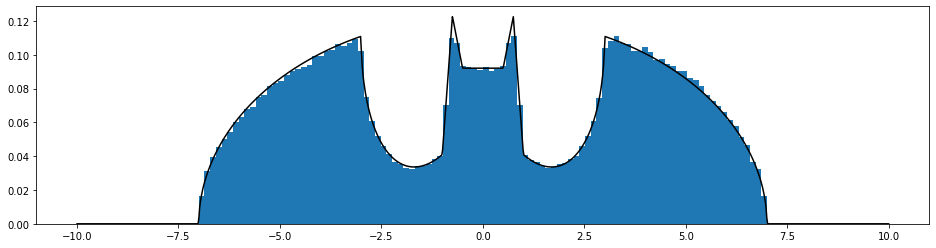

In [20]:
x = np.linspace(-10, 10, 10**3)
plt.figure(figsize=(16, 4))
plt.hist(samples, bins=100, density=True)
plt.plot(x, [target_function(_) for _ in x], color='black')
plt.show()

Nananananananna It looks like the pre-class!